## Task3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br/>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
data = df.groupby(['waterfront', 'grade']).size().reset_index(name='count')
data.head()

,waterfront,grade,count
0,0,1,1
1,0,3,3
2,0,4,29
3,0,5,238
4,0,6,2026


In [74]:
data2 = pd.crosstab(data['grade'], data['waterfront']).sort_values(by=1)
data2.rename(columns={0: 'no water', 1: 'water view'}, inplace=True)
data2.head()

waterfront,no water,water view
grade,,
1,1,0
3,1,0
4,1,0
13,1,0
5,1,1


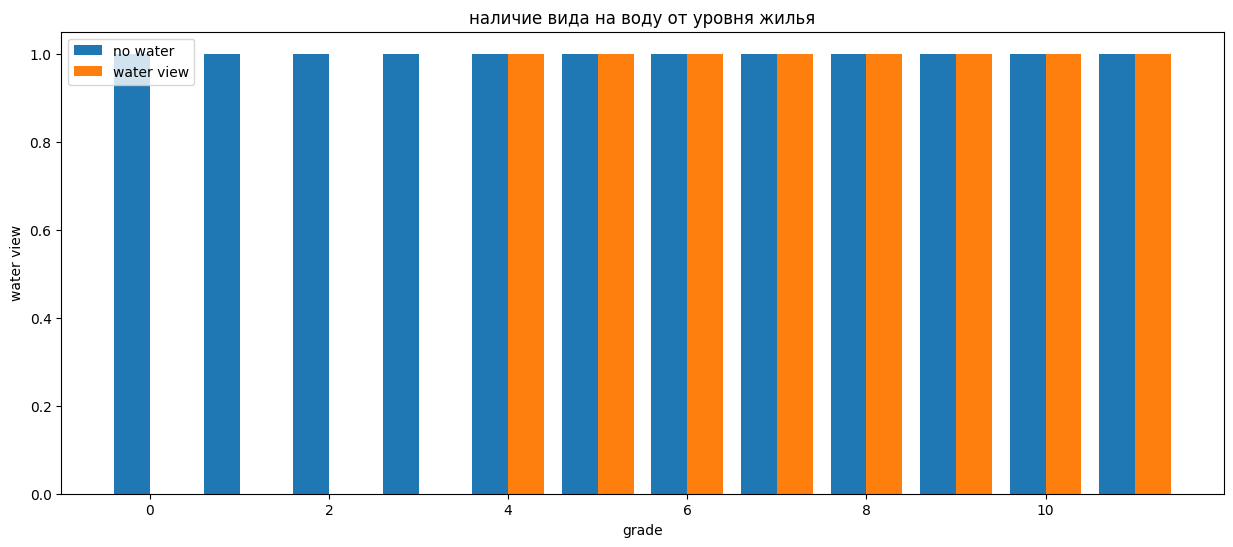

In [78]:

plt.figure(figsize=(15, 6))
n_ticks = np.arange(len(data2['no water']))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data2['no water'], width=w)
plt.bar(n_ticks + offset, data2['water view'], width=w)

plt.title('наличие вида на воду от уровня жилья')
plt.xlabel('grade')
plt.ylabel('water view')
plt.legend(['no water', 'water view'])

##### приведенный выше график показывает с какого уровня жилья доступен вид на воду
----------------------------------------------------------------------------------- 

In [29]:
data3 = df.groupby('price')['grade'].median().reset_index()
data4 = df.groupby('price')['sqft_living'].median().reset_index()
data5 = df.groupby('price')['floors'].median().reset_index()
data5.head(20)

,price,floors
0,75000.0,1.0
1,78000.0,1.0
2,80000.0,1.0
3,81000.0,1.0
4,82000.0,1.0
5,82500.0,1.0
6,83000.0,1.0
7,84000.0,1.0
8,85000.0,1.0
9,86500.0,1.0


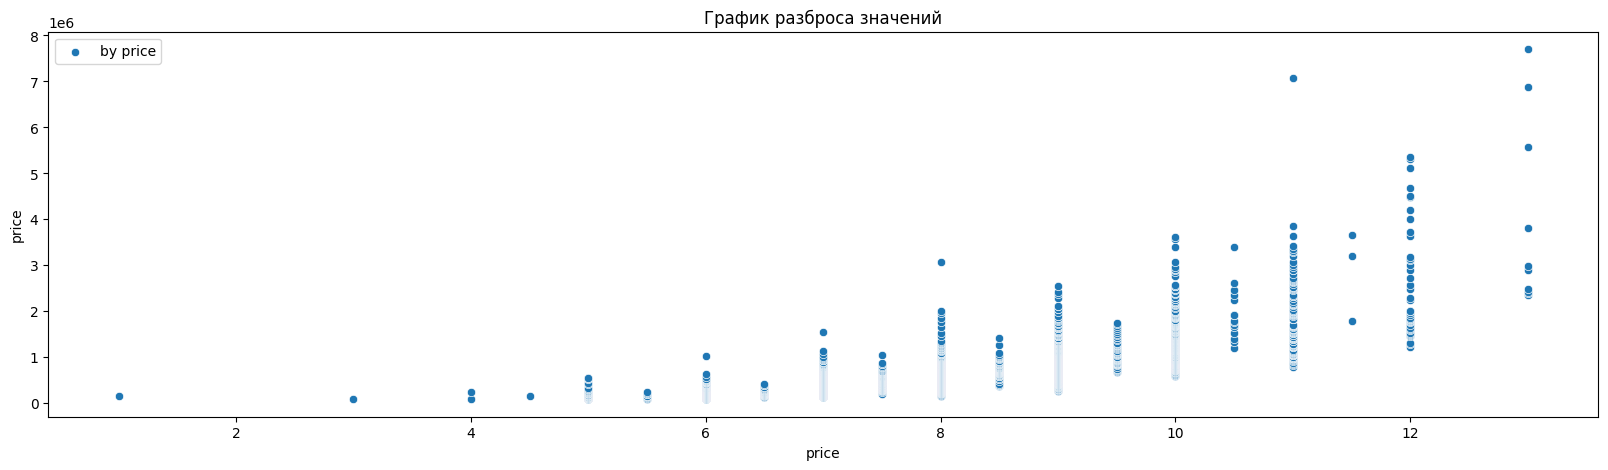

In [31]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=data3['grade'], y=data3['price'])
plt.title('price by grade')
plt.xlabel('price')
plt.ylabel('grade')

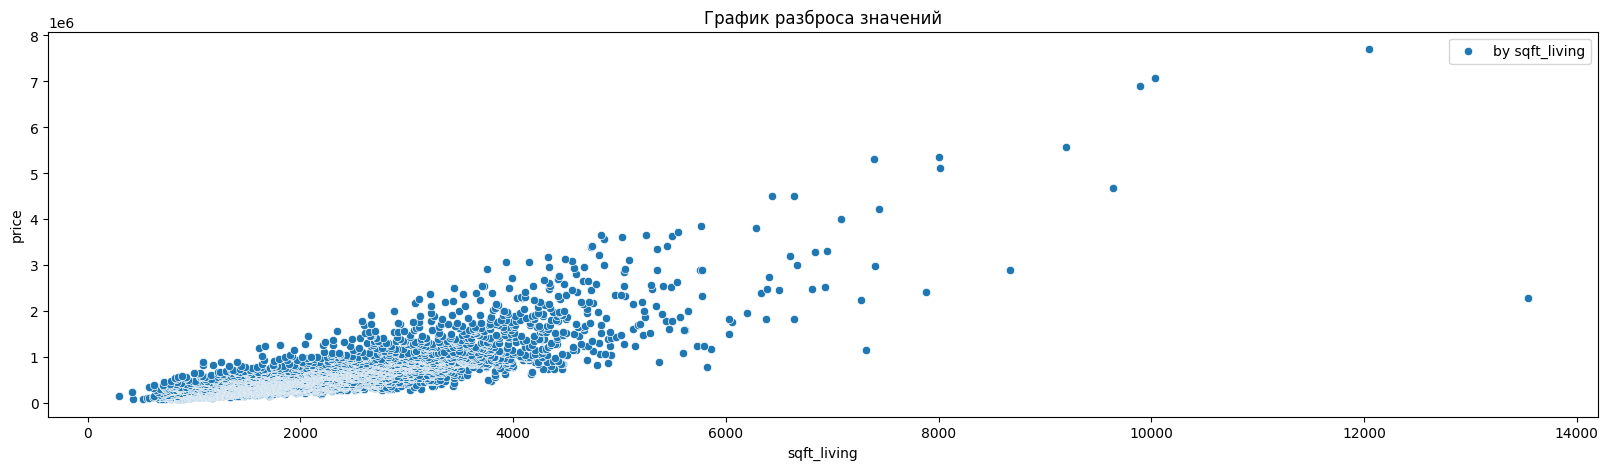

In [34]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=data4['sqft_living'], y=data4['price'])
plt.title('price by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')

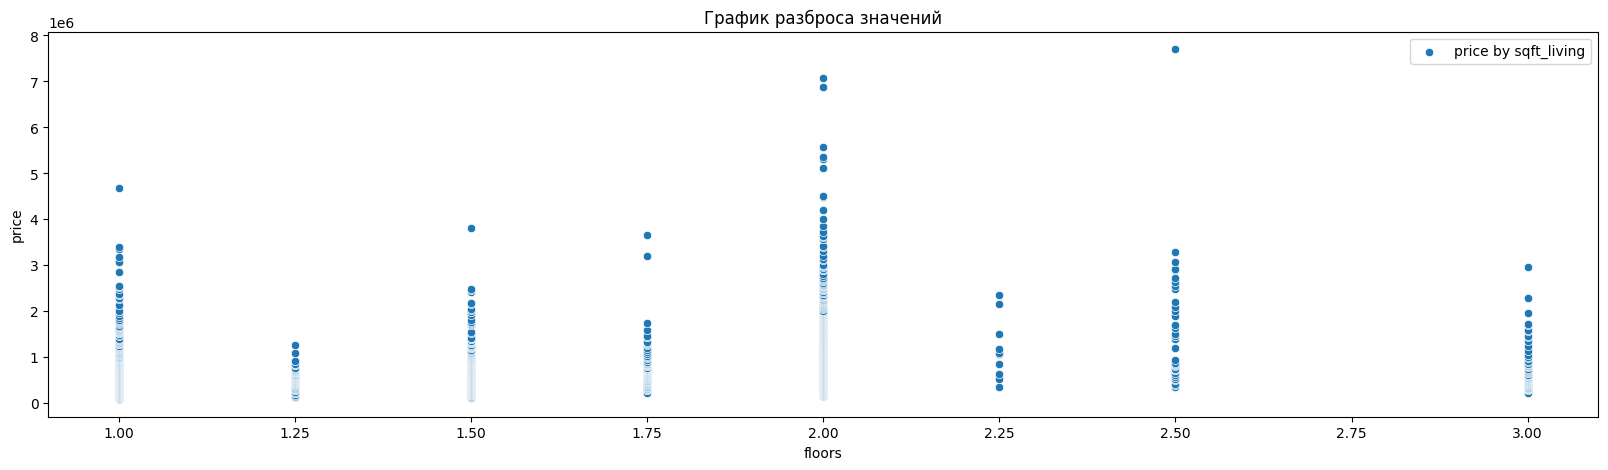

In [79]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=data5['floors'], y=data5['price'])
plt.title('price by sqft_living')
plt.xlabel('floors')
plt.ylabel('price')

##### приведенные выше графики показыват зависимости цены от 3 характеристик домов: уровня, площади и этажа.
##### за исключением этажности, цена растет в зависимости от роста характеристик. 
----------------------------------------------------------------------------------- 

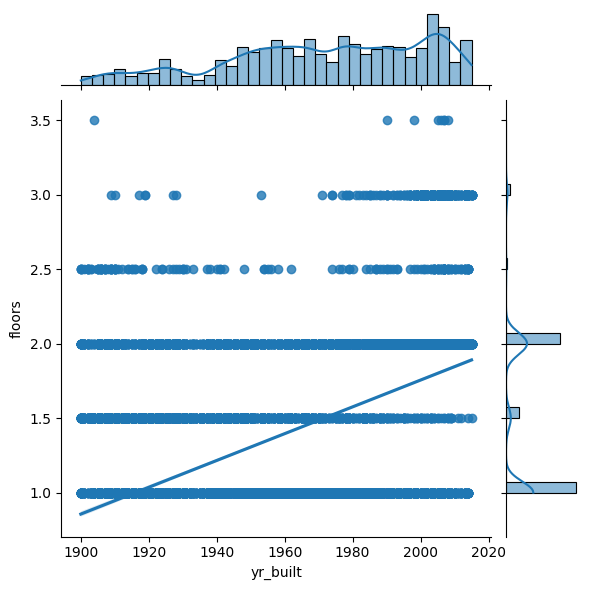

In [56]:
sns.jointplot(x=df['yr_built'], y=df['floors'], kind='reg')

##### график иллюстрирует линейную корреляцию между количеством домов по этажности и годом постройки. 

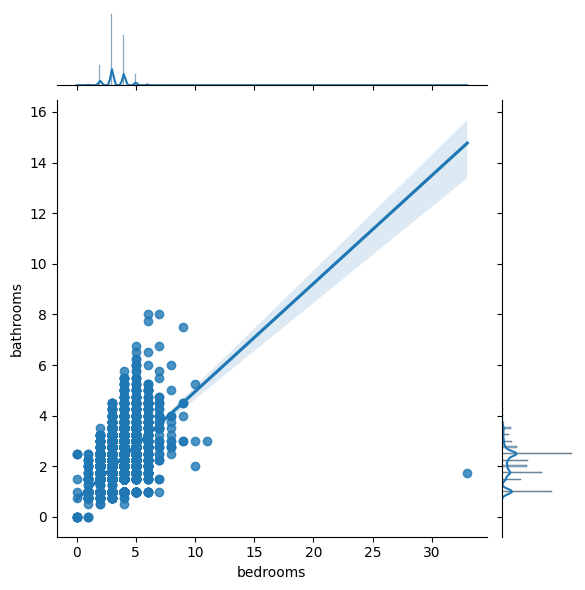

In [57]:
sns.jointplot(x=df['bedrooms'], y=df['bathrooms'], kind='reg')

##### график иллюстрирует линейную корреляцию между количеством спален и ванных. 